# Linear

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Foreign demand](#toc2_)    
- 3. [Discount factor](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["NUMBA_PARFOR_MAX_TUPLE_SIZE"] = "200"

import numpy as np
import pandas as pd
import numba as nb
nb.set_num_threads(4)

import matplotlib.pyplot as plt

import figs
from IHANKModel import HANKModelClass, create_model

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = HANKModelClass(name='HANK')
model.load_est_par(f'HANK_est_par_best')
model.load_x0s(f'HANK_x0s')
model.load_data()   

In [3]:
model.find_ss()

In [4]:
model.compute_jacs()

## 2. <a id='toc2_'></a>[Foreign demand](#toc0_)

In [5]:
shocks = model.get_foreign_shocks_from_LP()
model.find_transition_path(shocks=shocks,do_end_check=False)

In [6]:
model.find_IRFs(shocks=shocks)   

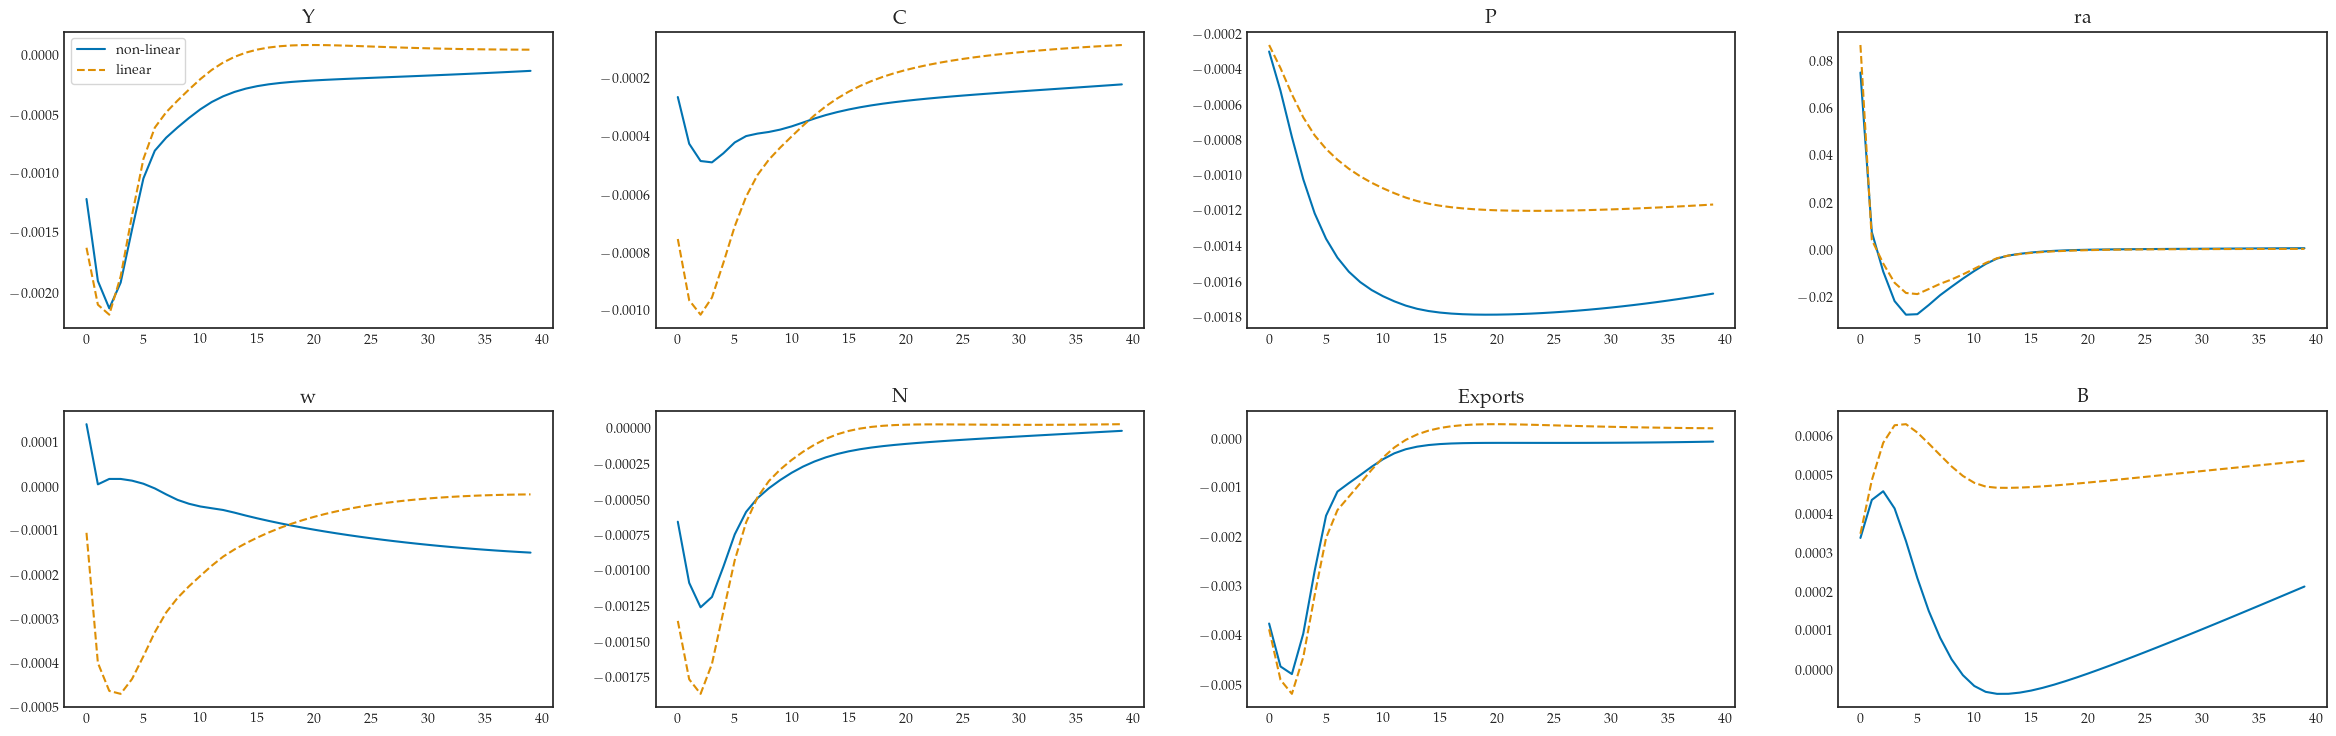

In [7]:
model.show_IRFs(['Y','C','P','ra','w','N','Exports','B'],
                do_shocks=False,do_targets=False,do_linear=True,T_max=40)

## 3. <a id='toc3_'></a>[Discount factor](#toc0_)

In [8]:
shocks = {'deps_beta':0.001*0.8**np.arange(model.par.T)}
model.find_transition_path(shocks=shocks,do_end_check=False)

In [9]:
model.find_IRFs(shocks=shocks)   

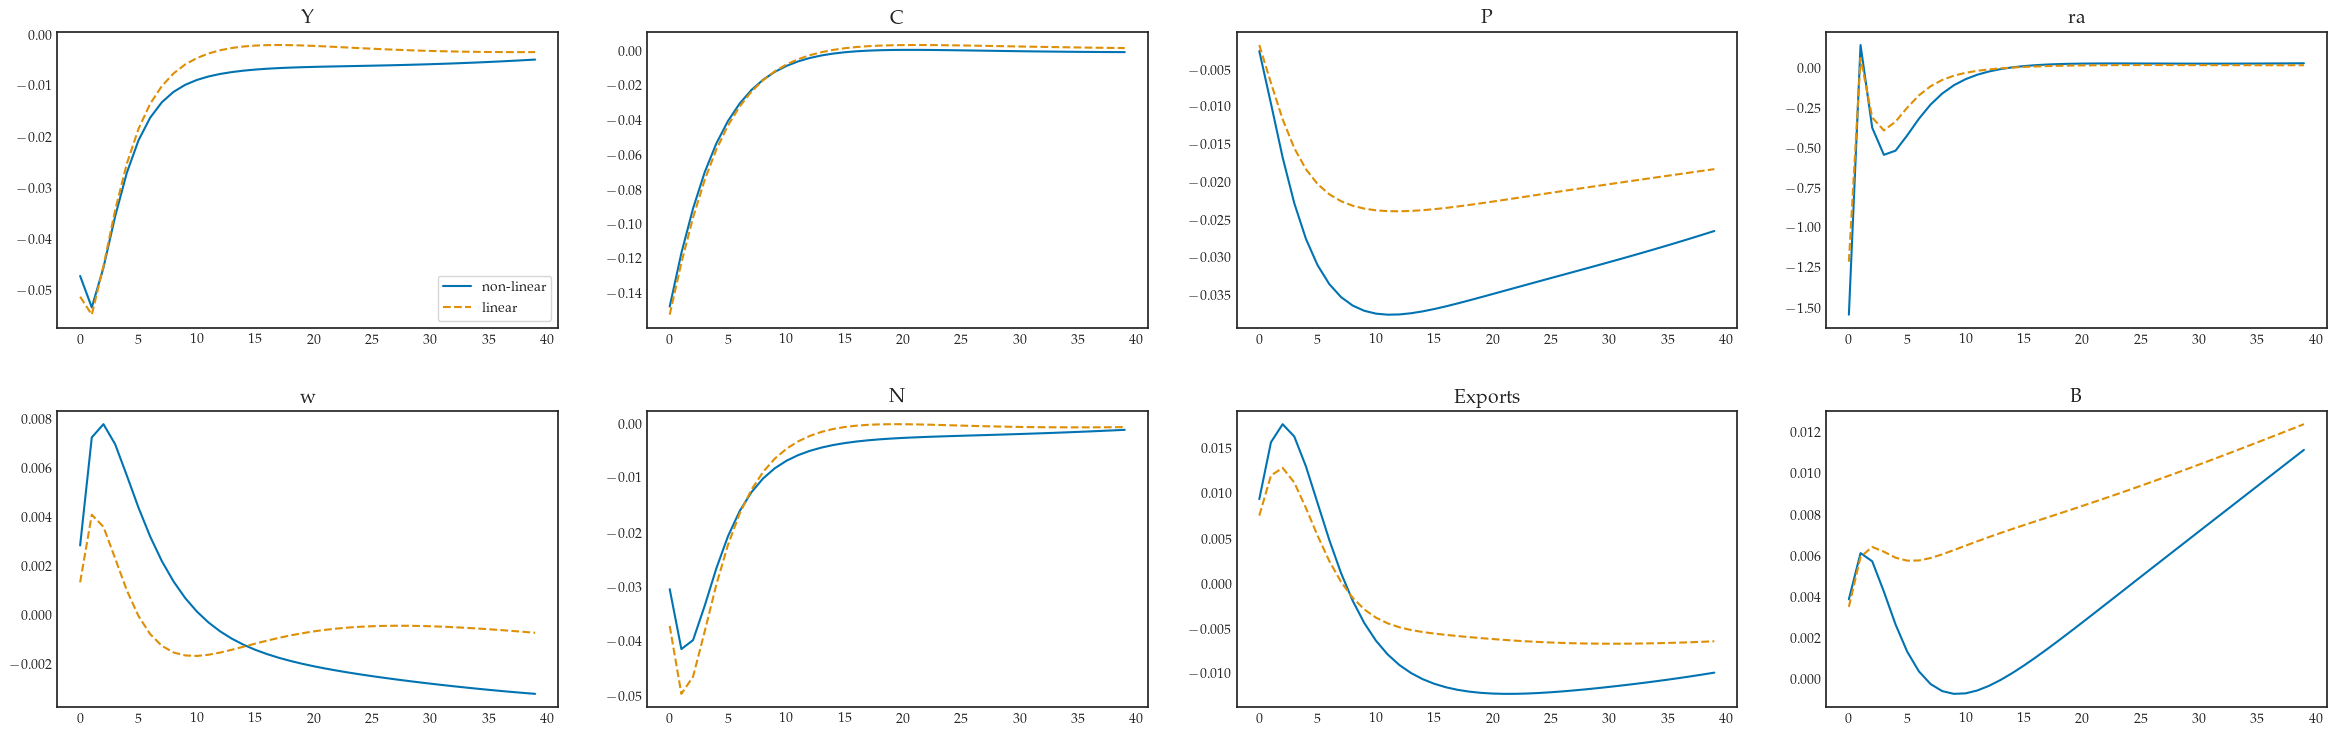

In [10]:
model.show_IRFs(['Y','C','P','ra','w','N','Exports','B'],
                do_shocks=False,do_targets=False,do_linear=True,T_max=40)